## Задание на лабораторную работу

Реализовать классификацию сортов растения ирис (Iris Setosa - 0, Iris Versicolour - 1, Iris
Virginica - 2) по четырем признакам: размерам пестиков и тычинок его цветков.

## Выполнение работы

Поключаем модули

In [10]:
import pandas
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Набор данных загружается с помощью библиотеки Pandas. После загрузки данных из файла ```python dataframe = pandas.read_csv("iris.csv", header=None)``` , необходимо разделить столбцы на входные данные (X) и выходные данные (Y).

In [3]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

При решении задач многоклассовой классификации хорошей практикой является
преобразование выходных атрибутов из вектора в матрицу к виду представленных ниже.

|Iris-setosa|Iris-versicolor|Iris-verginica|
|-----------|---------------|--------------|
|1|0|0|
|0|1|0|
|0|0|1|

Для этого необходимо использовать функцию *to_categorical()*

In [4]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)

Далее надо задать базовую архитектуру сети.

In [5]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

Далее нужно подготовить сеть к обучению. Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:
1. **функцию потерь**, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;
2. **оптимизатор** — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
3. **метрики для мониторинга на этапах обучения и тестирования** — здесь нас будет интересовать только точность (доля правильно классифицированных изображений).

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Теперь можно начинать обучение сети, для чего в случае использования библиотеки Keras
достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель под обучающие
данные.

In [11]:
f = model.fit(X, dummy_y, epochs=75, batch_size=10, validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 0s 6ms/step - loss: 0.3603 - accuracy: 0.9630 - val_loss: 0.5950 - val_accuracy: 0.9333
Epoch 2/75
14/14 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.9630 - val_loss: 0.6065 - val_accuracy: 0.9333
Epoch 3/75
14/14 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.9630 - val_loss: 0.5916 - val_accuracy: 0.9333
Epoch 4/75
14/14 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.9630 - val_loss: 0.6159 - val_accuracy: 0.8667
Epoch 5/75
14/14 [==============================] - 0s 3ms/step - loss: 0.3521 - accuracy: 0.9630 - val_loss: 0.5699 - val_accuracy: 0.9333
Epoch 6/75
14/14 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.9556 - val_loss: 0.5887 - val_accuracy: 0.9333
Epoch 7/75
14/14 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.9556 - val_loss: 0.5925 - val_accuracy: 0.9333
Epoch 8/75
14/14 [==

В процессе обучения отображаются четыре величины: потери сети на обучающих данных
и точность сети на обучающих данных, а также потери и точность на данных, не
участвовавших в обучении.

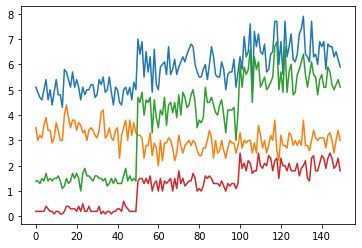

In [30]:
plt.plot(X)